In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Local imports.
from urbansurge.file_utils import set_inp_section, add_prcp_timeseries, set_raingage

In [2]:
# Path to the SWMM inp file.
swmm_dir = Path(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\SWMM_Files\SWMM")
inp_name = "Canandaigua_heatmap - Copy.inp"
out_name = "Canandaigua_heatmap - Copy.out"

swmm_path = str(swmm_dir / inp_name)
swmm_out_path = str(swmm_dir / out_name)

In [3]:
def unpack_series(series):
    "Unpacks SWMM output series into datetime and values."
    dts = [key for key in series.keys()]
    values = [val for val in series.values()]
    
    return dts, values

In [4]:
# Diameter values for a given component.
diameter_vals = [4.5, 4.6, 4.7, 4.8, 4.9, 5]
diameter_vals = np.linspace(4.5, 5.5, 15)

# Total storm depths.
depths = list(np.arange(0.1, 2, 0.1))
depths = list(np.linspace(0.1, 2, 15))

# Data from outfall.
outfall_data = {}

# Loop through roughness values and run model. Collect output flow at outfall.
max_depths = np.zeros((len(depths), len(diameter_vals)))
for di, d in enumerate(depths):
    for i, rough_val in enumerate(diameter_vals):

        # SWMM simulation.
        with Simulation(swmm_path) as sim:
            # Edit link parameters.
    #         # -----------------------------------
    #         section = 'CONDUITS'

    #         # Edit 1.
    #         column_name = 'Roughness'
    #         component_name = 3
    #         new_value = rough_val
    #         set_inp_section(swmm_path, section, column_name, component_name, new_value)

            # -----------------------------------

            # Diameter editing.
            # ----------------------------------------
            component_name = 2
            diam_section = 'XSECTIONS'
            column_name = 'Geom1'
            new_diam = rough_val

            # Set the new diameter.
            set_inp_section(swmm_path, diam_section, column_name, component_name, new_diam)

            # Edit precipitation timeseries.
            # -----------------------------------    
            # Edit 1.
            ts_name = 'HEATMAP'
            ts_description = 'TS_TEST_DESC'
            times = [1, 2, 3, 4, 5, 6]
#             values = [0, 0.1667, 0.1333, 0.1, 0.0666, 0.0333, 0.0]
            values = (2 * d) / (6**2 - 6) * (6 - np.array(times));
            times = [0] + times
            values = [0] + list(values)
            
#             print(times)
#             print(values)
#             raise
            
            add_prcp_timeseries(swmm_path, ts_name, ts_description, times, values, overwrite=True)

            # Set new timeseries to rain gauge.
            section = 'RAINGAGES'
            rg_ts_name = f'TIMESERIES {ts_name}'
            component_name = 1
            column_name = 'Source'
            set_raingage(swmm_path, column_name, component_name, rg_ts_name)

        # -----------------------------------
        with Simulation(swmm_path) as sim:
            # Run the model.
            for ind, step in enumerate(sim):
                if ind % 100 == 0:
                    print(sim.current_time, ",", round(sim.percent_complete * 100))

        # Collect output.
        # -----------------------------------
        with Output(swmm_out_path) as out:
            node_dt, node_series = unpack_series(out.node_series('18', NodeAttribute.INVERT_DEPTH))

        outfall_data[f'outfall_depth_{rough_val}'] = node_series
        outfall_data['datetime'] = node_dt
                
        max_depths[di, i] = np.max(node_series)


Updated Geom1 value to 4.5 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.571428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50

2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.357142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.428571428571429 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
20

2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.071428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.142857142857142 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
20

Updated Geom1 value to 4.785714285714286 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.857142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.571428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2

2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.357142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.428571428571429 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
20

Updated Geom1 value to 5.071428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.142857142857142 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.857142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.928571428571429 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2

Updated Geom1 value to 4.571428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.642857142857143 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

Updated Geom1 value to 5.357142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.428571428571429 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

Updated Geom1 value to 5.071428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.142857142857142 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.857142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2

Updated Geom1 value to 4.571428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.642857142857143 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.357142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.4

Updated Geom1 value to 5.071428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.142857142857142 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.785714285714286 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.857142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2

2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.5 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.571428571428571

Updated Geom1 value to 5.285714285714286 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.357142857142857 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
20

2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 5.071428571428571 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2

2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.785714285714286 for 2 in 2
2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97
Updated Geom1 value to 4.857142857142857 for 2 in 2
2017-01-01 00:00:30 , 0


C:\Users\ay434\AppData\Local\Temp\ipykernel_12108\3724719847.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(cbar.ax.get_yticks(), fontsize=12)


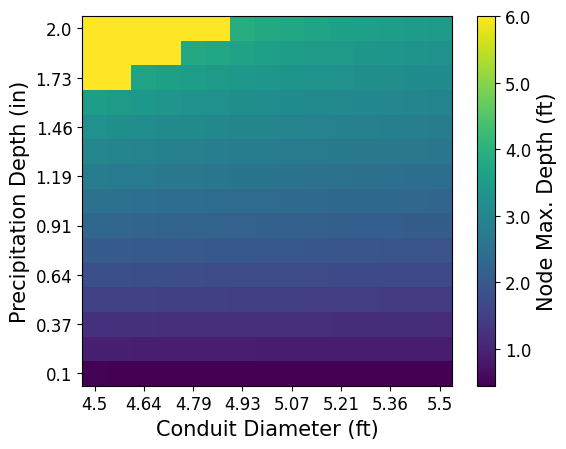

1.7285714285714286


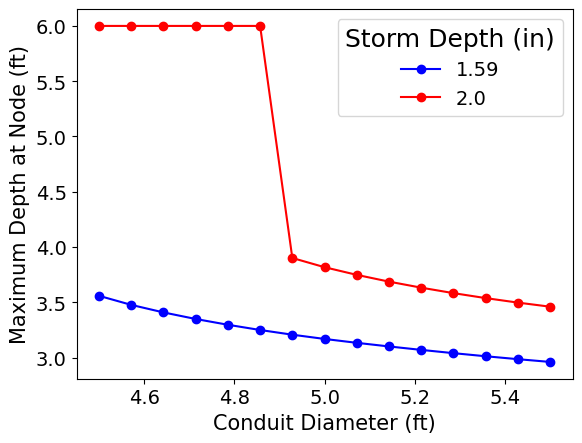

In [87]:
# print(max_depths)
skip = 2
fig, ax = plt.subplots()
heatmap = ax.imshow(max_depths, origin='lower')
ax.set_xticks(list(range(0,len(diameter_vals),skip)), [round(i,2) for i in diameter_vals[::skip]], fontsize=12)
ax.set_yticks(list(range(0,len(depths),skip)), [round(i,2) for i in depths[::skip]], fontsize=12)
ax.set_xlabel('Conduit Diameter (ft)', fontsize=15)
ax.set_ylabel('Precipitation Depth (in)', fontsize=15)
cbar = fig.colorbar(heatmap) 
cbar.set_label('Node Max. Depth (ft)',size=15)
cbar.set_ticklabels(cbar.ax.get_yticks(), fontsize=12)
plt.show()

fig, ax = plt.subplots()
ax.plot(diameter_vals, max_depths[11, :], 'bo-')
ax.plot(diameter_vals, max_depths[14, :], 'ro-')
ax.legend([round(depths[11], 2), round(depths[14], 2)], title='Storm Depth (in)', fontsize=14)
ax.set_xlabel('Conduit Diameter (ft)', fontsize=15)
ax.set_ylabel('Maximum Depth at Node (ft)', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.rcParams['legend.title_fontsize'] = 18
fig.savefig(r'C:\Users\ay434\Box\Research\NSF_SCC\Figures\node_flooding.png', dpi=300)

print(depths[12])